### Visualize classifier scores trained on sparse representations

In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np
import os

conf_sparsity_map_42 = {
    "001": 0.8,
    "002": 0.75,
    "003": 0.9,
    "006": 0.95,
    "007": 0.85,}

conf_sparsity_map_84 = {
    "016": 0.75,
    "017": 0.8,
    "018": 0.85,
    "019": 0.9,
    "020": 0.95,

}

conf_dict = {"42": conf_sparsity_map_42, "84": conf_sparsity_map_84}

exp_root = os.environ["EXP_ROOT"]
exp_tag = "sparse_classif"
exp_name = "asae_classif_urbasound8k"
seed =42

In [2]:
to_plot = {}
for ae_seed, conf_sparsity_map in conf_dict.items():
    sparsity = []
    acc = []
    mse = []
    auc = []
    for conf_id, spar in conf_sparsity_map.items():
        metrics = os.path.join(exp_root, "train/SAE", exp_tag, f"{conf_id}_{exp_name}_{seed}","metrics/metrics_summary_fold10.json")
        with open(metrics,"r") as fh:
            scores = json.load(fh)
        sparsity.append(spar)
        acc.append(scores["acc"]["mean"] * 100)
        mse.append(scores["mse_spec"]["mean"])
        auc.append(scores["auc"]["mean"] * 100)    
    
    to_plot[ae_seed] = {"mse": mse, "acc":acc, "auc":auc, "sparsity": sparsity}

# impact of the seed of the autoencoder on the MSE and the classification performance

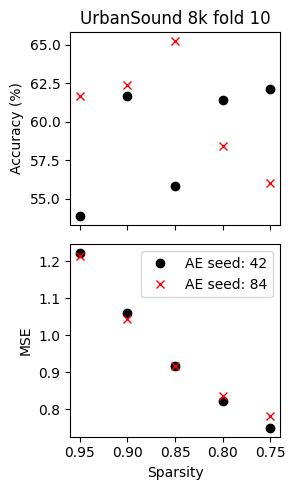

In [3]:
fig, axs = plt.subplots(2,1,figsize=(3,5), layout="tight", sharex=True)

for ae_seed, metrics_dict in to_plot.items():
    acc = metrics_dict["acc"]
    mse = metrics_dict["mse"]
    sparsity = metrics_dict["sparsity"]
    color = 'k' if int(ae_seed) == 42 else "r"
    marker = "o" if int(ae_seed) == 42 else "x"

    ax = axs[0]
    ax.plot(sparsity, acc, linestyle=" ", marker=marker, color=color, label=f"AE seed: {ae_seed}")
    ax.set_ylabel("Accuracy (%)")
    ax.set_title("UrbanSound 8k fold 10")
    ax.grid()

    ax = axs[1]
    ax.plot(sparsity, mse, linestyle=" ", marker=marker, color=color, label=f"AE seed: {ae_seed}")
    ax.set_xlabel("Sparsity")
    ax.set_ylabel("MSE")
    ax.grid()


axs[-1].invert_xaxis()
axs[-1].legend()

### impact of the classifier seed on the classification performance

In [4]:
conf_sparsity_map = {
    "016": 0.75,
    "017": 0.8,
    "018": 0.85,
    "019": 0.9,
    "020": 0.95,

}
classif_seeds = [42,84]
to_plot = {}
for seed in classif_seeds:
    sparsity = []
    acc = []
    mse = []
    auc = []
    for conf_id, spar in conf_sparsity_map.items():
        metrics = os.path.join(exp_root, "train/SAE", exp_tag, f"{conf_id}_{exp_name}_{seed}","metrics/metrics_summary_fold10.json")
        with open(metrics,"r") as fh:
            scores = json.load(fh)
        sparsity.append(spar)
        acc.append(scores["acc"]["mean"] * 100)
        mse.append(scores["mse_spec"]["mean"])
        auc.append(scores["auc"]["mean"] * 100)    
    
    to_plot[f"{seed}"] = {"mse": mse, "acc":acc, "auc":auc, "sparsity": sparsity}

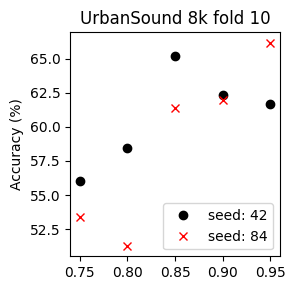

In [7]:
fig, ax = plt.subplots(1,1,figsize=(3,3), layout="tight")

for seed, metrics_dict in to_plot.items():
    acc = metrics_dict["acc"]
    mse = metrics_dict["mse"]
    sparsity = metrics_dict["sparsity"]
    color = 'k' if int(seed) == 42 else "r"
    marker = "o" if int(seed) == 42 else "x"

    ax.plot(sparsity, acc, linestyle=" ", marker=marker, color=color, label=f"seed: {seed}")
    ax.set_ylabel("Accuracy (%)")
    ax.set_title("UrbanSound 8k fold 10")
    ax.grid()

ax.legend()